# Homework 1 - EECS 600 Deep Learning

Name: 

Instructions: All assignments are to be completed individually. Please complete each question as best you can. Once you have completed all of the problems, reset your runtime or kernel and run the notebook in order. Download the .ipynb file and submit it via Canvas.

Library usage: Several of the algorithms implemented in this, and other assignments, have implementations available in tensorflow. For this assignment, you are limited to basic operations within tensorflow and cannot use their high level APIs like tf.optimizer

All code presented in class is free to use in your assignments.

Your grade is based on the correctness of your implementation, not the quality of your code but you are encouraged to include comments in your code to help the graders understand your decisions.

For clarity, the final operation you should take is restarting the runtime and running all.

Due Date: 9/24/19 - midnight EST

100 Points Total

In [0]:
import tensorflow as tf
import math
import random

import matplotlib.pyplot as plt
%matplotlib inline
tf.enable_eager_execution()

In [101]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255.
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255. 
y_test_sca = y_test
y_train_sca = y_train
y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)
print(x_train.shape)
print(y_train.shape)
print(y_test)

(60000, 784)
(60000, 10)
tf.Tensor(
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 10), dtype=float32)


## Recommendation
When building and testing your code, work on a smaller subset of the data. [This example](https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array) may help in that.

# Question 1
Implement a neural network with one hidden layer with 32 neurons with sigmoid activation functions and a softmax output layer with 10 outputs to classify the loaded MNIST digits as the number they represent. Each training step should be done with a batch size of 64 and the the order of the training samples should be shuffled each epoch. You may use the [tensorflow data API](https://www.tensorflow.org/beta/tutorials/load_data/numpy) to assist with that.

The loss function should me [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) between the prediction and the true results. At the end of each training epoch, the accuracy and loss value should be calculated for the whole training dataset and testing dataset. Use stochastic gradient descent as the training algorithm. Determine an effective learning rate.

In [0]:
'''
I think it should be noted that all of the following implementation was fully completed by myself. 
Thus, A few things run slowly due to the lack of vectorization and seeing positive training results may take a while.
'''

In [0]:
a = .5 #learning rate. I ended up using a relatively high value for learning rate
#because 3 epochs of ~900 batches is still far from causing bounces in loss at a = 0.1 to 0.5. 
#I could justifiably crank learning rate up even more.
#I believe a dynamic learning rate is called for in this shallow network.
b_size = 64 #batch size
epoch_num = 3
initialize_seed = 5
test_frequency = 25

test_loss_history_epoch = []
train_loss_history_epoch = []


record_frequency = 10
test_loss_history = []
train_loss_history= []

test_accu_history = []
train_accu_history = []
'''class MyModel(tf.keras.Model):
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(32, activation = tf.nn.sigmoid)
    self.dense2 = tf.keras.layers.Dense(10, activation = tf.nn.softmax)
  
  def call(self, input):
    x = self.dense1(input)
    return self.dense2(x)

def loss(predicted_y, desired_y):https://en.wikipedia.org/wiki/Mean_squared_error
  return tf.losses.mean_squared_error(predicted_y - desired_y)


def train(model, inputs, outputs, learning_rate):
  print(inputs.shape)
  print(outputs.shape)
  print(model(x_train).shape)
  with tf.GradientTape() as t:
    current_loss = loss(y_train,model(x_train))
  loss_history.append(current_loss.numpy())
  grads = tape.gradient(current_loss, MyModel.trainable_variables)
  print(grads)
 
model = MyModel()
train(model, x_train, y_train, learning_rate)'''


class MyModel():
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.w1 = tf.get_variable("w1", (784,32),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w2 = tf.get_variable("w2", (32,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b1 = tf.get_variable("b1", (1,32),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b2 = tf.get_variable("b2", (1,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.dw = [] 
    self.db = []
  
  def __call__(self, input):
    A1 = tf.matmul(input, self.w1) + tf.broadcast_to(self.b1, tf.matmul(input, self.w1).shape)
    A1 = tf.sigmoid(A1)
    A2 = tf.matmul(A1,self.w2) + tf.broadcast_to(self.b2, tf.matmul(A1,self.w2).shape)
    A2 = tf.nn.softmax(A2)
    return A2
  
  def update(self, dw, db, learning_rate = 0.1):
    self.w1 = tf.math.subtract(self.w1, tf.math.multiply(dw[0],learning_rate))
    self.w2 = tf.math.subtract(self.w2, tf.math.multiply(dw[1],learning_rate))
    self.b1 = tf.math.subtract(self.b1, tf.math.multiply(db[0],learning_rate))
    self.b2 = tf.math.subtract(self.b2, tf.math.multiply(db[1],learning_rate))
    
  
def train_batch(model, inputs, outputs, learning_rate):
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(model.w2)
    tape.watch(model.w1)
    tape.watch(model.b1)
    tape.watch(model.b2)
    current_loss = loss(y_train,model(x_train))
  [w1_grad] = tape.gradient(current_loss, [model.w1])
  [w2_grad] = tape.gradient(current_loss, [model.w2])
  [b1_grad] = tape.gradient(current_loss, [model.b1])
  [b2_grad] = tape.gradient(current_loss, [model.b2])
  model.update([w1_grad,w2_grad],[b1_grad,b2_grad],a)
  del tape

def train(model, input, labels, learning_rate, num_epoch = 1, batch_size = 64, small_data = False):
  batch_counter = 0
  for cur_epoch in range(0, num_epoch):
    seed = math.floor(100*random.random())
    input_batches, label_batches, batch_num = batchize(input, labels, batch_size, seed)
    print("Number of batches : {}".format(len(input_batches)))
    if small_data:
      batch_num = math.ceil(batch_num/5)
    for cur_batch in range(0, batch_num):
      batch_counter += 1
      if cur_batch % test_frequency == 0:
        train_acc, train_loss = test(model, input, labels)
        test_acc, test_loss = test(model, x_test, y_test)
        test_loss_history.append(test_loss)
        train_loss_history.append(train_loss)
        test_accu_history.append(test_acc)
        train_accu_history.append(train_acc)
        print("train accu {} loss {}, test accu {} loss {}".format(train_acc, train_loss, test_acc, test_loss))
        
      print("Training {} batch of {} epoch".format(cur_batch + 1,cur_epoch + 1))
      input_batch = input_batches[cur_batch]
      label_batch = label_batches[cur_batch]
      train_batch(model,input_batch,label_batch,learning_rate)
    train_acc, train_loss = test(model, input, labels)
    test_acc, test_loss = test(model, x_test, y_test)
    test_loss_history.append(test_loss)
    train_loss_history.append(train_loss)
    test_accu_history.append(test_acc)
    train_accu_history.append(train_acc)
    
    test_c, test_total, test_loss = test(model, x_test, y_test,False)
    print("Final Model Test Accuracy {}/{} Test Loss {}".format(test_c, test_total, test_loss))
    print("Epoch {} Testing loss{}".format(cur_epoch, test_loss))
  print("Total Batch Trained {} with size{}".format(batch_counter, batch_size))
  

def batchize(input, labels, batch_size = 64, seed = 10):
  tf.random.shuffle(input,seed)
  tf.random.shuffle(labels,seed)
  sample_num = input.shape[0]
  assert(input.shape[0] == labels.shape[0])
  input_batches = []
  label_batches = []
  i = 0
  while (i + 1) * batch_size < sample_num:
    input_batches.append(input[i:i+batch_size])
    label_batches.append(labels[i:i+batch_size])
    i = i + 1
  input_batches.append(input[i:])
  label_batches.append(labels[i:])
  return[input_batches, label_batches, i]
    

  
    
  
def loss(desired_y,predicted_y):
  return tf.losses.mean_squared_error(desired_y, predicted_y)

def test(model, inputs = x_test, labels = y_test, percentage = True):
  total = 0
  correct = 0
  prediction = model(inputs)
  num_tests = inputs.shape[0]
  for i in range(0, num_tests):
    pred = tf.math.argmax(input = prediction[i]).numpy()
    label = tf.math.argmax(input = labels[i]).numpy()
    if(label == pred):
      correct += 1
      total += 1
    else:
      total += 1
  accuracy = 1.0*correct/total
  print("Total {}, correct {}".format(total, correct))
  if percentage is True:
    return [correct/total, loss(prediction, labels)]
  return [correct, total, loss(prediction, labels)]
      

model = MyModel()
train(model, x_train, y_train, a,epoch_num,b_size)

Number of batches : 938
Total 60000, correct 7517
Total 10000, correct 1291
train accu 0.12528333333333333 loss 0.1365223228931427, test accu 0.1291 loss 0.13639838993549347
Training 1 batch of 1 epoch
Training 2 batch of 1 epoch
Training 3 batch of 1 epoch
Training 4 batch of 1 epoch
Training 5 batch of 1 epoch
Training 6 batch of 1 epoch
Training 7 batch of 1 epoch
Training 8 batch of 1 epoch
Training 9 batch of 1 epoch
Training 10 batch of 1 epoch
Training 11 batch of 1 epoch
Training 12 batch of 1 epoch
Training 13 batch of 1 epoch
Training 14 batch of 1 epoch
Training 15 batch of 1 epoch
Training 16 batch of 1 epoch
Training 17 batch of 1 epoch
Training 18 batch of 1 epoch
Training 19 batch of 1 epoch
Training 20 batch of 1 epoch
Training 21 batch of 1 epoch
Training 22 batch of 1 epoch
Training 23 batch of 1 epoch
Training 24 batch of 1 epoch
Training 25 batch of 1 epoch
Total 60000, correct 7879
Total 10000, correct 1352
train accu 0.13131666666666666 loss 0.1329977959394455, te

Plot the training and testing loss and the training and testing accuracy by epoch using [matplotlib](https://chrisalbon.com/deep_learning/keras/visualize_loss_history/)

.

<function matplotlib.pyplot.show>

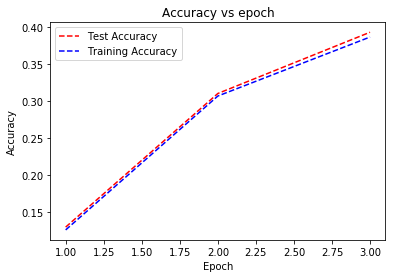

In [0]:

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Accuracy vs epoch')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

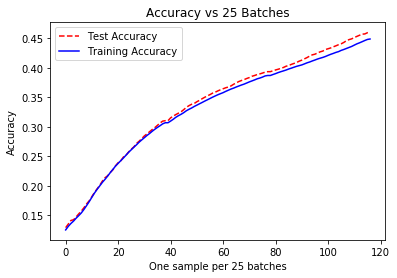

In [0]:


plt.xlabel('One sample per 25 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_accu_history, 'r--')
plt.plot(x_axis, train_accu_history, 'b-')
plt.title('Accuracy vs Batches')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

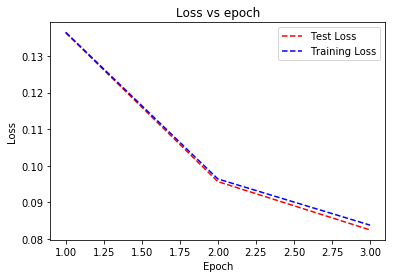

In [0]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Loss vs epoch')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

<function matplotlib.pyplot.show>

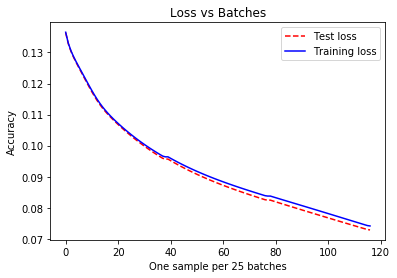

In [0]:

plt.xlabel('One sample per 25 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_loss_history, 'r--')
plt.plot(x_axis, train_loss_history, 'b-')
plt.title('Loss vs Batches')
plt.legend(['Test loss', 'Training loss'])
plt.show

## Question 1 Part 2
Change the size of your hidden layer to 16 neurons and re-run the training.

In [124]:
a = .5 #learning rate. I ended up using a relatively high value for learning rate
#because 3 epochs of ~900 batches is still far from causing bounces in loss at a = 0.1 to 0.5. 
#I could justifiably crank learning rate up even more.
#I believe a dynamic learning rate is called for in this shallow network.
b_size = 64 #batch size
epoch_num = 3
initialize_seed = 5
test_frequency = 25

test_loss_history_epoch = []
train_loss_history_epoch = []


record_frequency = 10
test_loss_history = []
train_loss_history= []

test_accu_history = []
train_accu_history = []

class MyModel():
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.w1 = tf.get_variable("w1", (784,16),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w2 = tf.get_variable("w2", (16,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))####Changed to 16 neurons here!
    self.b1 = tf.get_variable("b1", (1,16),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b2 = tf.get_variable("b2", (1,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.dw = [] 
    self.db = []
  
  def __call__(self, input):
    A1 = tf.matmul(input, self.w1) + tf.broadcast_to(self.b1, tf.matmul(input, self.w1).shape)
    A1 = tf.sigmoid(A1)
    A2 = tf.matmul(A1,self.w2) + tf.broadcast_to(self.b2, tf.matmul(A1,self.w2).shape)
    A2 = tf.nn.softmax(A2)
    return A2
  
  def update(self, dw, db, learning_rate = 0.1):
    self.w1 = tf.math.subtract(self.w1, tf.math.multiply(dw[0],learning_rate))
    self.w2 = tf.math.subtract(self.w2, tf.math.multiply(dw[1],learning_rate))
    self.b1 = tf.math.subtract(self.b1, tf.math.multiply(db[0],learning_rate))
    self.b2 = tf.math.subtract(self.b2, tf.math.multiply(db[1],learning_rate))
    
  
def train_batch(model, inputs, outputs, learning_rate):
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(model.w2)
    tape.watch(model.w1)
    tape.watch(model.b1)
    tape.watch(model.b2)
    current_loss = loss(y_train,model(x_train))
  [w1_grad] = tape.gradient(current_loss, [model.w1])
  [w2_grad] = tape.gradient(current_loss, [model.w2])
  [b1_grad] = tape.gradient(current_loss, [model.b1])
  [b2_grad] = tape.gradient(current_loss, [model.b2])
  model.update([w1_grad,w2_grad],[b1_grad,b2_grad],a)
  del tape

def train(model, input, labels, learning_rate, num_epoch = 1, batch_size = 64, small_data = False):
  batch_counter = 0
  for cur_epoch in range(0, num_epoch):
    batch_counter += 1
    seed = math.floor(100*random.random())
    input_batches, label_batches, batch_num = batchize(input, labels, batch_size, seed)
    print("Number of batches : {}".format(len(input_batches)))
    if small_data:
      batch_num = math.ceil(batch_num/5)
    for cur_batch in range(0, batch_num):
      if cur_batch % test_frequency == 0:
        train_loss = loss(model(input), labels)
        train_acc = accuracy(model, input, y_train_sca)
        test_loss = loss(model(x_test), y_test)
        test_acc = accuracy(model, x_test, y_test_sca)
        test_loss_history.append(test_loss)
        train_loss_history.append(train_loss)
        test_accu_history.append(test_acc)
        train_accu_history.append(train_acc)
        print("train accu {} loss {}, test accu {} loss {}".format(train_acc, train_loss, test_acc, test_loss))
        
      #print("Training {} batch of {} epoch".format(cur_batch + 1,cur_epoch + 1))
      input_batch = input_batches[cur_batch]
      label_batch = label_batches[cur_batch]
      train_batch(model,input_batch,label_batch,learning_rate)
    train_acc, train_loss = test(model, input, labels)
    test_acc, test_loss = test(model, x_test, y_test)
    test_loss_history.append(test_loss)
    train_loss_history.append(train_loss)
    test_accu_history.append(test_acc)
    train_accu_history.append(train_acc)
    
    test_c, test_total, test_loss = test(model, x_test, y_test,False)
    print("Final Model Test Accuracy {}/{} Test Loss {}".format(test_c, test_total, test_loss))
    print("Epoch {} Testing loss{}".format(cur_epoch, test_loss))
  print("Total Batch Trained {} with size{}".format(batch_counter, batch_size))
  

def batchize(input, labels, batch_size = 64, seed = 10):
  tf.random.shuffle(input,seed)
  tf.random.shuffle(labels,seed)
  sample_num = input.shape[0]
  assert(input.shape[0] == labels.shape[0])
  input_batches = []
  label_batches = []
  i = 0
  while (i + 1) * batch_size < sample_num:
    input_batches.append(input[i:i+batch_size])
    label_batches.append(labels[i:i+batch_size])
    i = i + 1
  input_batches.append(input[i:])
  label_batches.append(labels[i:])
  return[input_batches, label_batches, i]
    

def accuracy(model, x, y):
  y_hat = model(x).numpy().argmax(axis=1)
  acc = (y_hat == y).sum() / y.shape[0]
  return acc
    
  
def loss(desired_y,predicted_y):
  return tf.losses.mean_squared_error(desired_y, predicted_y)

def test(model, inputs = x_test, labels = y_test, percentage = True):
  total = 0
  correct = 0
  prediction = model(inputs)
  num_tests = inputs.shape[0]
  for i in range(0, num_tests):
    pred = tf.math.argmax(input = prediction[i]).numpy()
    label = tf.math.argmax(input = labels[i]).numpy()
    if(label == pred):
      correct += 1
      total += 1
    else:
      total += 1
  accuracy = 1.0*correct/total
  print("Total {}, correct {}".format(total, correct))
  if percentage is True:
    return [correct/total, loss(prediction, labels)]
  return [correct, total, loss(prediction, labels)]
      

model = MyModel()
train(model, x_train, y_train, a,epoch_num,b_size)

Number of batches : 938
Total 60000, correct 8956
Total 10000, correct 1453
train accu 0.14926666666666666 loss 0.12418209761381149, test accu 0.1453 loss 0.12480609118938446
Total 60000, correct 9115
Total 10000, correct 1487
train accu 0.15191666666666667 loss 0.1227271631360054, test accu 0.1487 loss 0.12334402650594711
Total 60000, correct 9259
Total 10000, correct 1497
train accu 0.15431666666666666 loss 0.1215578243136406, test accu 0.1497 loss 0.12217587977647781
Total 60000, correct 9350
Total 10000, correct 1512
train accu 0.15583333333333332 loss 0.12051708251237869, test accu 0.1512 loss 0.12113548070192337
Total 60000, correct 9459
Total 10000, correct 1532
train accu 0.15765 loss 0.11955325305461884, test accu 0.1532 loss 0.12016960978507996


KeyboardInterrupt: ignored

Plot the training and testing loss and the training and testing accuracy by epoch using [matplotlib](https://chrisalbon.com/deep_learning/keras/visualize_loss_history/)



<function matplotlib.pyplot.show>

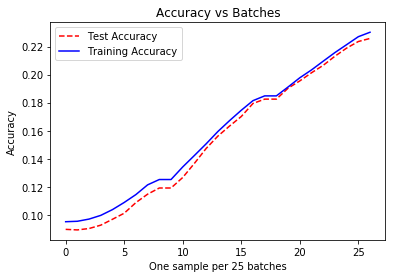

In [0]:
plt.xlabel('One sample per 25 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_accu_history, 'r--')
plt.plot(x_axis, train_accu_history, 'b-')
plt.title('Accuracy vs Batches')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

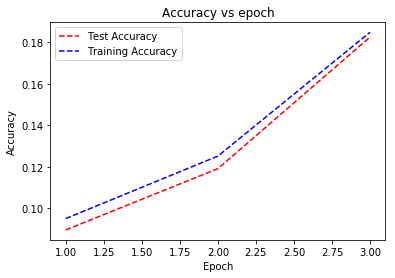

In [0]:

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Accuracy vs epoch')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

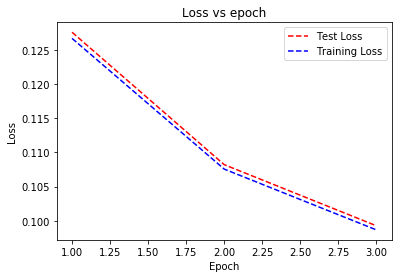

In [0]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Loss vs epoch')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

<function matplotlib.pyplot.show>

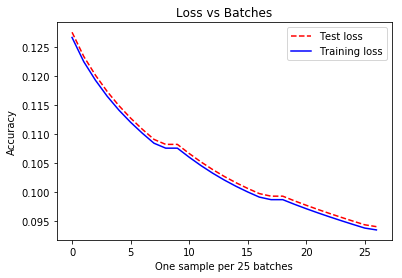

In [0]:

plt.xlabel('One sample per 25 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_loss_history, 'r--')
plt.plot(x_axis, train_loss_history, 'b-')
plt.title('Loss vs Batches')
plt.legend(['Test loss', 'Training loss'])
plt.show

##Question 1 Part 3
Change your network architecture to have two hidden layers each of size 16 and re-run the training

In [0]:
a = .5 #learning rate. I ended up using a relatively high value for learning rate
#because 3 epochs of ~900 batches is still far from causing bounces in loss at a = 0.1 to 0.5. 
#I could justifiably crank learning rate up even more.
#I believe a dynamic learning rate is called for in this shallow network.
b_size = 64 #batch size
epoch_num = 3
initialize_seed = 5
test_frequency = 33 

test_loss_history_epoch = []
train_loss_history_epoch = []


record_frequency = 10
test_loss_history = []
train_loss_history= []

test_accu_history = []
train_accu_history = []

class MyModel():
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.w1 = tf.get_variable("w1", (784,16),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w2 = tf.get_variable("w2", (16,16),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w3 = tf.get_variable("w3", (16, 10),
                             initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b1 = tf.get_variable("b1", (1,16),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b2 = tf.get_variable("b2", (1,16),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b3 = tf.get_variable("b3", (1, 10),
                             initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.dw = [] 
    self.db = []
  
  def __call__(self, input):
    A1 = tf.matmul(input, self.w1) + tf.broadcast_to(self.b1, tf.matmul(input, self.w1).shape)
    A1 = tf.sigmoid(A1)
    A2 = tf.matmul(A1,self.w2) + tf.broadcast_to(self.b2, tf.matmul(A1,self.w2).shape)
    A2 = tf.sigmoid(A2)
    A3 = tf.matmul(A2,self.w3) + tf.broadcast_to(self.b3, tf.matmul(A2,self.w3).shape)
    A3 = tf.nn.softmax(A3)
    return A3
  
  def update(self, dw, db, learning_rate = 0.1):
    self.w1 = tf.math.subtract(self.w1, tf.math.multiply(dw[0],learning_rate))
    self.w2 = tf.math.subtract(self.w2, tf.math.multiply(dw[1],learning_rate))
    self.w3 = tf.math.subtract(self.w3, tf.math.multiply(dw[2],learning_rate))
    self.b1 = tf.math.subtract(self.b1, tf.math.multiply(db[0],learning_rate))
    self.b2 = tf.math.subtract(self.b2, tf.math.multiply(db[1],learning_rate))
    self.b3 = tf.math.subtract(self.b3, tf.math.multiply(db[2],learning_rate))
  
def train_batch(model, inputs, outputs, learning_rate):
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(model.w2)
    tape.watch(model.w1)
    tape.watch(model.w3)
    tape.watch(model.b1)
    tape.watch(model.b2)
    tape.watch(model.b3)
    current_loss = loss(y_train,model(x_train))
  [w1_grad] = tape.gradient(current_loss, [model.w1])
  [w2_grad] = tape.gradient(current_loss, [model.w2])
  [w3_grad] = tape.gradient(current_loss, [model.w3])
  [b1_grad] = tape.gradient(current_loss, [model.b1])
  [b2_grad] = tape.gradient(current_loss, [model.b2])
  [b3_grad] = tape.gradient(current_loss, [model.b3])
  model.update([w1_grad,w2_grad,w3_grad],[b1_grad,b2_grad,b3_grad],a)
  del tape

def train(model, input, labels, learning_rate, num_epoch = 1, batch_size = 64, small_data = False):
  batch_counter = 0
  for cur_epoch in range(0, num_epoch):
    seed = math.floor(100*random.random())
    input_batches, label_batches, batch_num = batchize(input, labels, batch_size, seed)
    print("Number of batches : {}".format(len(input_batches)))
    if small_data:
      batch_num = math.ceil(batch_num/4)
    for cur_batch in range(0, batch_num):
      if cur_batch % test_frequency == 0:
        test_acc, test_loss = test(model, x_test, y_test)
        train_loss = loss(model(input),labels)
        test_loss_history.append(test_loss)
        test_accu_history.append(test_acc)
        train_loss_history.append(train_loss)
        print("train accu {} loss {}, test accu {} loss {}".format('NA', train_loss, test_acc, test_loss))
        
      #print("Training {} batch of {} epoch".format(cur_batch + 1,cur_epoch + 1))
      input_batch = input_batches[cur_batch]
      label_batch = label_batches[cur_batch]
      train_batch(model,input_batch,label_batch,learning_rate)
    train_acc, train_loss = test(model, input, labels)
    test_acc, test_loss = test(model, x_test, y_test)
    test_loss_history.append(test_loss)
    train_loss_history.append(train_loss)
    test_accu_history.append(test_acc)
    train_accu_history.append(train_acc)
    test_c, test_total, test_loss = test(model, x_test, y_test,False)
    print("Final Model Test Accuracy {}/{} Test Loss {}".format(test_c, test_total, test_loss))
    print("Epoch {} Testing loss{}".format(cur_epoch, test_loss))
  print("Total Batch Trained {} with size".format(batch_counter, batch_size))
  

def batchize(input, labels, batch_size = 64, seed = 10):
  tf.random.shuffle(input,seed)
  tf.random.shuffle(labels,seed)
  sample_num = input.shape[0]
  assert(input.shape[0] == labels.shape[0])
  input_batches = []
  label_batches = []
  i = 0
  while (i + 1) * batch_size < sample_num:
    input_batches.append(input[i:i+batch_size])
    label_batches.append(labels[i:i+batch_size])
    i = i + 1
  input_batches.append(input[i:])
  label_batches.append(labels[i:])
  return[input_batches, label_batches, i]
    

  
    
  
def loss(desired_y,predicted_y):
  return tf.losses.mean_squared_error(desired_y, predicted_y)

def test(model, inputs = x_test, labels = y_test, percentage = True):
  total = 0
  correct = 0
  prediction = model(inputs)
  num_tests = inputs.shape[0]
  for i in range(0, num_tests):
    pred = tf.math.argmax(input = prediction[i]).numpy()
    label = tf.math.argmax(input = labels[i]).numpy()
    if(label == pred):
      correct += 1
      total += 1
    else:
      total += 1
  accuracy = 1.0*correct/total
  print("Total {}, correct {}".format(total, correct))
  if percentage is True:
    return [correct/total, loss(prediction, labels)]
  return [correct, total, loss(prediction, labels)]
      
def test(model, inputs = x_test, labels = y_test, percentage = True):
  total = 0
  correct = 0
  prediction = model(inputs)
  num_tests = inputs.shape[0]
  for i in range(0, num_tests):
    pred = tf.math.argmax(input = prediction[i]).numpy()
    label = tf.math.argmax(input = labels[i]).numpy()
    if(label == pred):
      correct += 1
      total += 1
    else:
      total += 1
  accuracy = 1.0*correct/total
  print("Total {}, correct {}".format(total, correct))
  if percentage is True:
    return [correct/total, loss(prediction, labels)]
  return [correct, total, loss(prediction, labels)]
      
model = MyModel()
train(model, x_train, y_train, a,epoch_num,b_size, True)

Number of batches : 938
Total 10000, correct 1209
train accu NA loss 0.11522895842790604, test accu 0.1209 loss 0.11552136391401291
Training 1 batch of 1 epoch
Training 2 batch of 1 epoch
Training 3 batch of 1 epoch
Training 4 batch of 1 epoch
Training 5 batch of 1 epoch
Training 6 batch of 1 epoch
Training 7 batch of 1 epoch
Training 8 batch of 1 epoch
Training 9 batch of 1 epoch
Training 10 batch of 1 epoch
Training 11 batch of 1 epoch
Training 12 batch of 1 epoch
Training 13 batch of 1 epoch
Training 14 batch of 1 epoch
Training 15 batch of 1 epoch
Training 16 batch of 1 epoch
Training 17 batch of 1 epoch
Training 18 batch of 1 epoch
Training 19 batch of 1 epoch
Training 20 batch of 1 epoch
Training 21 batch of 1 epoch
Training 22 batch of 1 epoch
Training 23 batch of 1 epoch
Training 24 batch of 1 epoch
Training 25 batch of 1 epoch
Training 26 batch of 1 epoch
Training 27 batch of 1 epoch
Training 28 batch of 1 epoch
Training 29 batch of 1 epoch
Training 30 batch of 1 epoch
Trainin

Plot the training and testing loss and the training and testing accuracy by epoch using [matplotlib](https://chrisalbon.com/deep_learning/keras/visualize_loss_history/)
![alt text](https://)

<function matplotlib.pyplot.show>

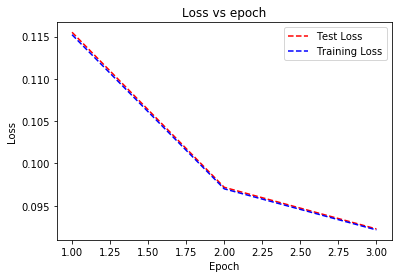

In [0]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Loss vs epoch')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

<function matplotlib.pyplot.show>

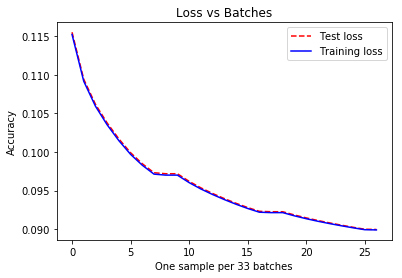

In [0]:

plt.xlabel('One sample per 33 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_loss_history, 'r--')
plt.plot(x_axis, train_loss_history, 'b-')
plt.title('Loss vs Batches')
plt.legend(['Test loss', 'Training loss'])
plt.show

<function matplotlib.pyplot.show>

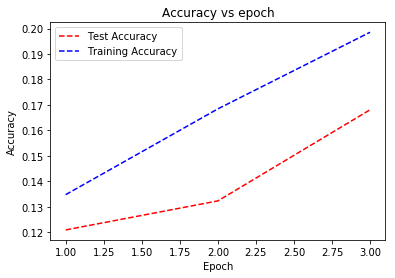

In [0]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_accu_history, 'b--')
plt.title('Accuracy vs epoch')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

## Question 1 Part 4
Change the activation functions in the hidden layer to ReLU and re-run the training

In [83]:
a = .5 #learning rate. I ended up using a relatively high value for learning rate
#because 3 epochs of ~900 batches is still far from over fitting at a = 0.1 to 0.5. 
#I could justifiably crank learning rate up even more
b_size = 64 #batch size
epoch_num = 3
initialize_seed = 5
test_frequency = 40

test_loss_history_epoch = []
train_loss_history_epoch = []


record_frequency = 10
test_loss_history = []
train_loss_history= []

test_accu_history = []
train_accu_history = []

class MyModel():
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.w1 = tf.get_variable("w1", (784,16),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w2 = tf.get_variable("w2", (16,16),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w3 = tf.get_variable("w3", (16, 10),
                             initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b1 = tf.get_variable("b1", (1,16),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b2 = tf.get_variable("b2", (1,16),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b3 = tf.get_variable("b3", (1, 10),
                             initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.dw = [] 
    self.db = []
  
  def __call__(self, input):
    A1 = tf.matmul(input, self.w1) + tf.broadcast_to(self.b1, tf.matmul(input, self.w1).shape)
    A1 = tf.nn.relu(A1)#changed to relu here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    A2 = tf.matmul(A1,self.w2) + tf.broadcast_to(self.b2, tf.matmul(A1,self.w2).shape)
    A2 = tf.nn.relu(A2)
    A3 = tf.matmul(A2,self.w3) + tf.broadcast_to(self.b3, tf.matmul(A2,self.w3).shape)
    A3 = tf.nn.softmax(A3)
    return A3
  
  def update(self, dw, db, learning_rate = 0.1):
    self.w1 = tf.math.subtract(self.w1, tf.math.multiply(dw[0],learning_rate))
    self.w2 = tf.math.subtract(self.w2, tf.math.multiply(dw[1],learning_rate))
    self.w3 = tf.math.subtract(self.w3, tf.math.multiply(dw[2],learning_rate))
    self.b1 = tf.math.subtract(self.b1, tf.math.multiply(db[0],learning_rate))
    self.b2 = tf.math.subtract(self.b2, tf.math.multiply(db[1],learning_rate))
    self.b3 = tf.math.subtract(self.b3, tf.math.multiply(db[2],learning_rate))
  
def train_batch(model, inputs, outputs, learning_rate):
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(model.w2)
    tape.watch(model.w1)
    tape.watch(model.w3)
    tape.watch(model.b1)
    tape.watch(model.b2)
    tape.watch(model.b3)
    current_loss = loss(y_train,model(x_train))
  [w1_grad] = tape.gradient(current_loss, [model.w1])
  [w2_grad] = tape.gradient(current_loss, [model.w2])
  [w3_grad] = tape.gradient(current_loss, [model.w3])
  [b1_grad] = tape.gradient(current_loss, [model.b1])
  [b2_grad] = tape.gradient(current_loss, [model.b2])
  [b3_grad] = tape.gradient(current_loss, [model.b3])
  model.update([w1_grad,w2_grad,w3_grad],[b1_grad,b2_grad,b3_grad],a)
  del tape

def train(model, input, labels, learning_rate, num_epoch = 1, batch_size = 64, small_data = False):
  batch_counter = 0
  for cur_epoch in range(0, num_epoch):
    seed = math.floor(100*random.random())
    input_batches, label_batches, batch_num = batchize(input, labels, batch_size, seed)
    print("Number of batches : {}".format(len(input_batches)))
    if small_data:
      batch_num = math.ceil(batch_num/3)
    for cur_batch in range(0, batch_num):
      if cur_batch % test_frequency == 0:
        train_acc, train_loss = test(model, input, labels)
        test_acc, test_loss = test(model, x_test, y_test)
        test_loss_history.append(test_loss)
        train_loss_history.append(train_loss)
        test_accu_history.append(test_acc)
        train_accu_history.append(train_acc)
        print("train accu {} loss {}, test accu {} loss {}".format(train_acc, train_loss, test_acc, test_loss))
        
      #print("Training {} batch of {} epoch".format(cur_batch + 1,cur_epoch + 1))
      input_batch = input_batches[cur_batch]
      label_batch = label_batches[cur_batch]
      train_batch(model,input_batch,label_batch,learning_rate)
    train_acc, train_loss = test(model, input, labels)
    test_acc, test_loss = test(model, x_test, y_test)
    test_loss_history.append(test_loss)
    train_loss_history.append(train_loss)
    test_accu_history.append(test_acc)
    train_accu_history.append(train_acc)
    
    test_c, test_total, test_loss = test(model, x_test, y_test,False)
    print("Final Model Test Accuracy {}/{} Test Loss {}".format(test_c, test_total, test_loss))
    print("Epoch {} Testing loss{}".format(cur_epoch, test_loss))
  print("Total Batch Trained {} with size".format(batch_counter, batch_size))
  

def batchize(input, labels, batch_size = 64, seed = 10):
  tf.random.shuffle(input,seed)
  tf.random.shuffle(labels,seed)
  sample_num = input.shape[0]
  assert(input.shape[0] == labels.shape[0])
  input_batches = []
  label_batches = []
  i = 0
  while (i + 1) * batch_size < sample_num:
    input_batches.append(input[i:i+batch_size])
    label_batches.append(labels[i:i+batch_size])
    i = i + 1
  input_batches.append(input[i:])
  label_batches.append(labels[i:])
  return[input_batches, label_batches, i]
    

  
    
  
def loss(desired_y,predicted_y):
  return tf.losses.mean_squared_error(desired_y, predicted_y)

def test(model, inputs = x_test, labels = y_test, percentage = True):
  total = 0
  correct = 0
  prediction = model(inputs)
  num_tests = inputs.shape[0]
  for i in range(0, num_tests):
    pred = tf.math.argmax(input = prediction[i]).numpy()
    label = tf.math.argmax(input = labels[i]).numpy()
    if(label == pred):
      correct += 1
      total += 1
    else:
      total += 1
  accuracy = 1.0*correct/total
  print("Total {}, correct {}".format(total, correct))
  if percentage is True:
    return [correct/total, loss(prediction, labels)]
  return [correct, total, loss(prediction, labels)]
      

model = MyModel()
train(model, x_train, y_train, a,epoch_num,b_size)

Number of batches : 938
Total 60000, correct 7476
Total 10000, correct 1214
train accu 0.1246 loss 0.17074619233608246, test accu 0.1214 loss 0.17149004340171814
Training 1 batch of 1 epoch
Training 2 batch of 1 epoch
Training 3 batch of 1 epoch
Training 4 batch of 1 epoch
Training 5 batch of 1 epoch
Training 6 batch of 1 epoch
Training 7 batch of 1 epoch
Training 8 batch of 1 epoch
Training 9 batch of 1 epoch
Training 10 batch of 1 epoch
Training 11 batch of 1 epoch
Training 12 batch of 1 epoch
Training 13 batch of 1 epoch
Training 14 batch of 1 epoch
Training 15 batch of 1 epoch
Training 16 batch of 1 epoch
Training 17 batch of 1 epoch
Training 18 batch of 1 epoch
Training 19 batch of 1 epoch
Training 20 batch of 1 epoch
Training 21 batch of 1 epoch
Training 22 batch of 1 epoch
Training 23 batch of 1 epoch
Training 24 batch of 1 epoch
Training 25 batch of 1 epoch
Training 26 batch of 1 epoch
Training 27 batch of 1 epoch
Training 28 batch of 1 epoch
Training 29 batch of 1 epoch
Traini

Plot the training and testing loss and the training and testing accuracy by epoch using [matplotlib](https://chrisalbon.com/deep_learning/keras/visualize_loss_history/)


<function matplotlib.pyplot.show>

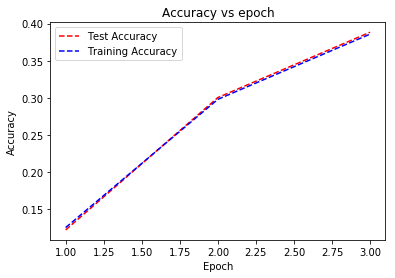

In [84]:

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Accuracy vs epoch')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show


<function matplotlib.pyplot.show>

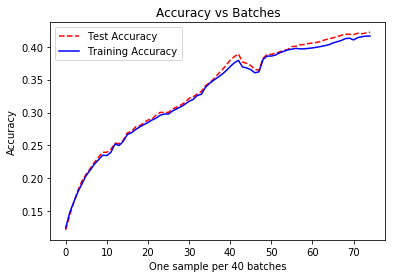

In [86]:


plt.xlabel('One sample per 40 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_accu_history, 'r--')
plt.plot(x_axis, train_accu_history, 'b-')
plt.title('Accuracy vs Batches')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show


<function matplotlib.pyplot.show>

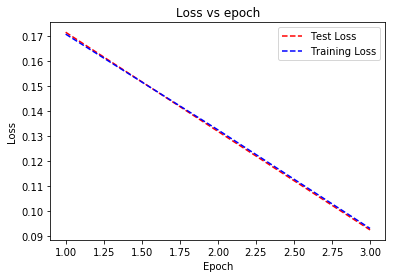

In [87]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Loss vs epoch')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

<function matplotlib.pyplot.show>

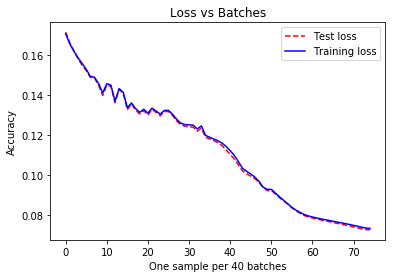

In [89]:

plt.xlabel('One sample per 40 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_loss_history, 'r--')
plt.plot(x_axis, train_loss_history, 'b-')
plt.title('Loss vs Batches')
plt.legend(['Test loss', 'Training loss'])
plt.show

## Question 1 part 5
Describe how changing the size of the hidden layer and the number of hidden layers impacted the predictions of the network.

Decreasing the size of the hidden layer decreased resulting accuracy and slower rate of accuracy gain. 

Adding a hidden layer further decreased resulting accuracy. I think this is because gradients are more difficult to pass back to earlier layers. 
Therefore, although this model should ultimately be more accurate with infinite training, 3 epoches were not enough to show its advantage. 


# Question 2 Part 1

Re-use the network built above but modify the update step to the following.

\begin{align}
V_t = \beta V_{t-1} + (1-\beta)g_t \\
W_{t+1} = W_t - \alpha V_t
\end{align}

where $V_t$ is the update vector for step $t$. Use $\beta=0.1$.

In [96]:
a = .5 #learning rate. I ended up using a relatively high value for learning rate
#because 3 epochs of ~900 batches is still far from causing bounces in loss at a = 0.1 to 0.5. 
#I could justifiably crank learning rate up even more.
#I believe a dynamic learning rate is called for in this shallow network.
b_size = 64 #batch size
epoch_num = 3
initialize_seed = 5
test_frequency = 25
beta = 0.1
test_loss_history_epoch = []
train_loss_history_epoch = []


record_frequency = 50
test_loss_history = []
train_loss_history= []

test_accu_history = []
train_accu_history = []


class MyModel():
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.w1 = tf.get_variable("w1", (784,32),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w2 = tf.get_variable("w2", (32,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b1 = tf.get_variable("b1", (1,32),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b2 = tf.get_variable("b2", (1,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.dw = [] 
    self.db = []
    self.vdw1 = 0
    self.vdw2 = 0
    self.vdb1 = 0
    self.vdb2 = 0
  
  def __call__(self, input):
    A1 = tf.matmul(input, self.w1) + tf.broadcast_to(self.b1, tf.matmul(input, self.w1).shape)
    A1 = tf.sigmoid(A1)
    A2 = tf.matmul(A1,self.w2) + tf.broadcast_to(self.b2, tf.matmul(A1,self.w2).shape)
    A2 = tf.nn.softmax(A2)
    return A2
  
  def update(self, dw, db, learning_rate = 0.1, beta = 0.1):#####################momentum implemented here!!
    self.w1.assign_sub(learning_rate * (dw[0] * (1 - beta) + self.vdw1 * beta))
    self.w2.assign_sub(learning_rate * (dw[1] * (1 - beta) + self.vdw2 * beta))
    self.b1.assign_sub(learning_rate * (db[0] * (1 - beta) + self.vdb1 * beta))
    self.b2.assign_sub(learning_rate * (db[1] * (1 - beta) + self.vdb2 * beta))
    
    self.vdw1 = learning_rate * (dw[0] * (1 - beta) + self.vdw1 * beta)
    self.vdw2 = learning_rate * (dw[1] * (1 - beta) + self.vdw2 * beta)
    self.vdb1 = learning_rate * (db[0] * (1 - beta) + self.vdb1 * beta)
    self.vdb2 = learning_rate * (db[1] * (1 - beta) + self.vdb2 * beta)
    
    
  
def train_batch(model, inputs, outputs, learning_rate):
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(model.w2)
    tape.watch(model.w1)
    tape.watch(model.b1)
    tape.watch(model.b2)
    current_loss = loss(y_train,model(x_train))
  [w1_grad] = tape.gradient(current_loss, [model.w1])
  [w2_grad] = tape.gradient(current_loss, [model.w2])
  [b1_grad] = tape.gradient(current_loss, [model.b1])
  [b2_grad] = tape.gradient(current_loss, [model.b2])
  model.update([w1_grad,w2_grad],[b1_grad,b2_grad],a)
  del tape

def train(model, input, labels, learning_rate, num_epoch = 1, batch_size = 64, small_data = False):
  batch_counter = 0
  for cur_epoch in range(0, num_epoch):
    seed = math.floor(100*random.random())
    input_batches, label_batches, batch_num = batchize(input, labels, batch_size, seed)
    print("Number of batches : {}".format(len(input_batches)))
    if small_data:
      batch_num = math.ceil(batch_num/3)
    for cur_batch in range(0, batch_num):
      batch_counter += 1
      if cur_batch % test_frequency == 0:
        train_acc, train_loss = test(model, input, labels)
        test_acc, test_loss = test(model, x_test, y_test)
        test_loss_history.append(test_loss)
        train_loss_history.append(train_loss)
        test_accu_history.append(test_acc)
        train_accu_history.append(train_acc)
        print("train accu {} loss {}, test accu {} loss {}".format(train_acc, train_loss, test_acc, test_loss))
        
      #print("Training {} batch of {} epoch".format(cur_batch + 1,cur_epoch + 1))
      input_batch = input_batches[cur_batch]
      label_batch = label_batches[cur_batch]
      train_batch(model,input_batch,label_batch,learning_rate)
    train_acc, train_loss = test(model, input, labels)
    test_acc, test_loss = test(model, x_test, y_test)
    test_loss_history.append(test_loss)
    train_loss_history.append(train_loss)
    test_accu_history.append(test_acc)
    train_accu_history.append(train_acc)
    
    test_c, test_total, test_loss = test(model, x_test, y_test,False)
    print("Final Model Test Accuracy {}/{} Test Loss {}".format(test_c, test_total, test_loss))
    print("Epoch {} Testing loss{}".format(cur_epoch, test_loss))
  print("Total Batch Trained {} with size{}".format(batch_counter, batch_size))
  

def batchize(input, labels, batch_size = 64, seed = 10):
  tf.random.shuffle(input,seed)
  tf.random.shuffle(labels,seed)
  sample_num = input.shape[0]
  assert(input.shape[0] == labels.shape[0])
  input_batches = []
  label_batches = []
  i = 0
  while (i + 1) * batch_size < sample_num:
    input_batches.append(input[i:i+batch_size])
    label_batches.append(labels[i:i+batch_size])
    i = i + 1
  input_batches.append(input[i:])
  label_batches.append(labels[i:])
  return[input_batches, label_batches, i]
    

  
    
  
def loss(desired_y,predicted_y):
  return tf.losses.mean_squared_error(desired_y, predicted_y)

def test(model, inputs = x_test, labels = y_test, percentage = True):
  total = 0
  correct = 0
  prediction = model(inputs)
  num_tests = inputs.shape[0]
  for i in range(0, num_tests):
    pred = tf.math.argmax(input = prediction[i]).numpy()
    label = tf.math.argmax(input = labels[i]).numpy()
    if(label == pred):
      correct += 1
      total += 1
    else:
      total += 1
  accuracy = 1.0*correct/total
  print("Total {}, correct {}".format(total, correct))
  if percentage is True:
    return [correct/total, loss(prediction, labels)]
  return [correct, total, loss(prediction, labels)]
      

model = MyModel()
train(model, x_train, y_train, a,epoch_num,b_size,True)

Number of batches : 938
Total 60000, correct 3417
Total 10000, correct 586
train accu 0.05695 loss 0.15703913569450378, test accu 0.0586 loss 0.1573038250207901
Training 1 batch of 1 epoch
Training 2 batch of 1 epoch
Training 3 batch of 1 epoch
Training 4 batch of 1 epoch
Training 5 batch of 1 epoch
Training 6 batch of 1 epoch
Training 7 batch of 1 epoch
Training 8 batch of 1 epoch
Training 9 batch of 1 epoch
Training 10 batch of 1 epoch
Training 11 batch of 1 epoch
Training 12 batch of 1 epoch
Training 13 batch of 1 epoch
Training 14 batch of 1 epoch
Training 15 batch of 1 epoch
Training 16 batch of 1 epoch
Training 17 batch of 1 epoch
Training 18 batch of 1 epoch
Training 19 batch of 1 epoch
Training 20 batch of 1 epoch
Training 21 batch of 1 epoch
Training 22 batch of 1 epoch
Training 23 batch of 1 epoch
Training 24 batch of 1 epoch
Training 25 batch of 1 epoch
Total 60000, correct 3306
Total 10000, correct 553
train accu 0.0551 loss 0.14996837079524994, test accu 0.0553 loss 0.1503

Plot the training and testing loss and the training and testing accuracy by epoch using [matplotlib](https://chrisalbon.com/deep_learning/keras/visualize_loss_history/)


<function matplotlib.pyplot.show>

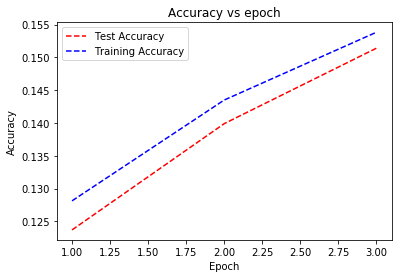

In [105]:

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Accuracy vs epoch')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

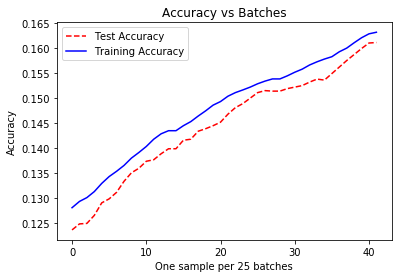

In [104]:
plt.xlabel('One sample per 25 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_accu_history, 'r--')
plt.plot(x_axis, train_accu_history, 'b-')
plt.title('Accuracy vs Batches')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

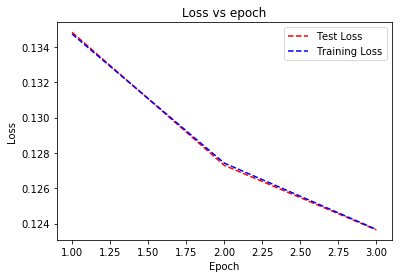

In [106]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Loss vs epoch')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

<function matplotlib.pyplot.show>

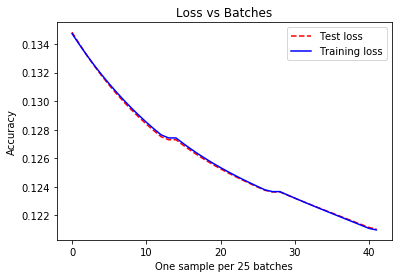

In [107]:

plt.xlabel('One sample per 25 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_loss_history, 'r--')
plt.plot(x_axis, train_loss_history, 'b-')
plt.title('Loss vs Batches')
plt.legend(['Test loss', 'Training loss'])
plt.show

## Question 2 part 2
Re-run the training with $\beta=0.9$

In [103]:
a = .5 
b_size = 64 #batch size
epoch_num = 3
initialize_seed = 5
test_frequency = 25
beta = 0.1
test_loss_history_epoch = []
train_loss_history_epoch = []


record_frequency = 50
test_loss_history = []
train_loss_history= []

test_accu_history = []
train_accu_history = []

class MyModel():
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.w1 = tf.get_variable("w1", (784,32),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w2 = tf.get_variable("w2", (32,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b1 = tf.get_variable("b1", (1,32),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b2 = tf.get_variable("b2", (1,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.dw = [] 
    self.db = []
    self.vdw1 = 0
    self.vdw2 = 0
    self.vdb1 = 0
    self.vdb2 = 0
  
  def __call__(self, input):
    A1 = tf.matmul(input, self.w1) + tf.broadcast_to(self.b1, tf.matmul(input, self.w1).shape)
    A1 = tf.sigmoid(A1)
    A2 = tf.matmul(A1,self.w2) + tf.broadcast_to(self.b2, tf.matmul(A1,self.w2).shape)
    A2 = tf.nn.softmax(A2)
    return A2
  
  def update(self, dw, db, learning_rate = 0.1, beta = 0.9):#####################momentum implemented here!!
    self.w1.assign_sub(learning_rate * (dw[0] * (1 - beta) + self.vdw1 * beta))
    self.w2.assign_sub(learning_rate * (dw[1] * (1 - beta) + self.vdw2 * beta))
    self.b1.assign_sub(learning_rate * (db[0] * (1 - beta) + self.vdb1 * beta))
    self.b2.assign_sub(learning_rate * (db[1] * (1 - beta) + self.vdb2 * beta))
    
    self.vdw1 = learning_rate * (dw[0] * (1 - beta) + self.vdw1 * beta)
    self.vdw2 = learning_rate * (dw[1] * (1 - beta) + self.vdw2 * beta)
    self.vdb1 = learning_rate * (db[0] * (1 - beta) + self.vdb1 * beta)
    self.vdb2 = learning_rate * (db[1] * (1 - beta) + self.vdb2 * beta)
    
    
  
def train_batch(model, inputs, outputs, learning_rate):
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(model.w2)
    tape.watch(model.w1)
    tape.watch(model.b1)
    tape.watch(model.b2)
    current_loss = loss(y_train,model(x_train))
  [w1_grad] = tape.gradient(current_loss, [model.w1])
  [w2_grad] = tape.gradient(current_loss, [model.w2])
  [b1_grad] = tape.gradient(current_loss, [model.b1])
  [b2_grad] = tape.gradient(current_loss, [model.b2])
  model.update([w1_grad,w2_grad],[b1_grad,b2_grad],a)
  del tape

def train(model, input, labels, learning_rate, num_epoch = 1, batch_size = 64, small_data = False):
  batch_counter = 0
  for cur_epoch in range(0, num_epoch):
    seed = math.floor(100*random.random())
    input_batches, label_batches, batch_num = batchize(input, labels, batch_size, seed)
    print("Number of batches : {}".format(len(input_batches)))
    if small_data:
      batch_num = math.ceil(batch_num/3)
    for cur_batch in range(0, batch_num):
      batch_counter += 1
      if cur_batch % test_frequency == 0:
        train_loss = loss(model(input), labels)
        train_acc = accuracy(model, input, y_train_sca)
        test_loss = loss(model(x_test), y_test)
        test_acc = accuracy(model, x_test, y_test_sca)
        test_loss_history.append(test_loss)
        train_loss_history.append(train_loss)
        test_accu_history.append(test_acc)
        train_accu_history.append(train_acc)
        print("train accu {} loss {}, test accu {} loss {}".format(train_acc, train_loss, test_acc, test_loss))
        
      #print("Training {} batch of {} epoch".format(cur_batch + 1,cur_epoch + 1))
      input_batch = input_batches[cur_batch]
      label_batch = label_batches[cur_batch]
      train_batch(model,input_batch,label_batch,learning_rate)
    train_acc, train_loss = test(model, input, labels)
    test_acc, test_loss = test(model, x_test, y_test)
    test_loss_history.append(test_loss)
    train_loss_history.append(train_loss)
    test_accu_history.append(test_acc)
    train_accu_history.append(train_acc)
    
    test_c, test_total, test_loss = test(model, x_test, y_test,False)
    print("Final Model Test Accuracy {}/{} Test Loss {}".format(test_c, test_total, test_loss))
    print("Epoch {} Testing loss{}".format(cur_epoch, test_loss))
  print("Total Batch Trained {} with size{}".format(batch_counter, batch_size))
  

def batchize(input, labels, batch_size = 64, seed = 10):
  tf.random.shuffle(input,seed)
  tf.random.shuffle(labels,seed)
  sample_num = input.shape[0]
  assert(input.shape[0] == labels.shape[0])
  input_batches = []
  label_batches = []
  i = 0
  while (i + 1) * batch_size < sample_num:
    input_batches.append(input[i:i+batch_size])
    label_batches.append(labels[i:i+batch_size])
    i = i + 1
  input_batches.append(input[i:])
  label_batches.append(labels[i:])
  return[input_batches, label_batches, i]
    

  
    
  
def loss(desired_y,predicted_y):
  return tf.losses.mean_squared_error(desired_y, predicted_y)

def accuracy(model, x, y):
  y_hat = model(x).numpy().argmax(axis=1)
  acc = (y_hat == y).sum() / y.shape[0]
  return acc

def test(model, inputs = x_test, labels = y_test, percentage = True):
  total = 0
  correct = 0
  prediction = model(inputs)
  num_tests = inputs.shape[0]
  for i in range(0, num_tests):
    pred = tf.math.argmax(input = prediction[i]).numpy()
    label = tf.math.argmax(input = labels[i]).numpy()
    if(label == pred):
      correct += 1
      total += 1
    else:
      total += 1
  accuracy = 1.0*correct/total
  print("Total {}, correct {}".format(total, correct))
  if percentage is True:
    return [correct/total, loss(prediction, labels)]
  return [correct, total, loss(prediction, labels)]
      

model = MyModel()
train(model, x_train, y_train, a,epoch_num,b_size,True)

Number of batches : 938
train accu 0.12813333333333332 loss 0.13473020493984222, test accu 0.1237 loss 0.13482889533042908
Training 1 batch of 1 epoch
Training 2 batch of 1 epoch
Training 3 batch of 1 epoch
Training 4 batch of 1 epoch
Training 5 batch of 1 epoch
Training 6 batch of 1 epoch
Training 7 batch of 1 epoch
Training 8 batch of 1 epoch
Training 9 batch of 1 epoch
Training 10 batch of 1 epoch
Training 11 batch of 1 epoch
Training 12 batch of 1 epoch
Training 13 batch of 1 epoch
Training 14 batch of 1 epoch
Training 15 batch of 1 epoch
Training 16 batch of 1 epoch
Training 17 batch of 1 epoch
Training 18 batch of 1 epoch
Training 19 batch of 1 epoch
Training 20 batch of 1 epoch
Training 21 batch of 1 epoch
Training 22 batch of 1 epoch
Training 23 batch of 1 epoch
Training 24 batch of 1 epoch
Training 25 batch of 1 epoch
train accu 0.12938333333333332 loss 0.13395851850509644, test accu 0.1249 loss 0.13400058448314667
Training 26 batch of 1 epoch
Training 27 batch of 1 epoch
Trai

Plot the training and testing loss and the training and testing accuracy by epoch using [matplotlib](https://chrisalbon.com/deep_learning/keras/visualize_loss_history/)


<function matplotlib.pyplot.show>

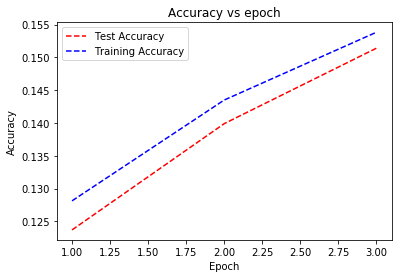

In [108]:

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Accuracy vs epoch')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

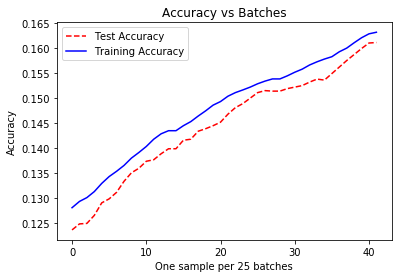

In [109]:
plt.xlabel('One sample per 25 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_accu_history, 'r--')
plt.plot(x_axis, train_accu_history, 'b-')
plt.title('Accuracy vs Batches')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

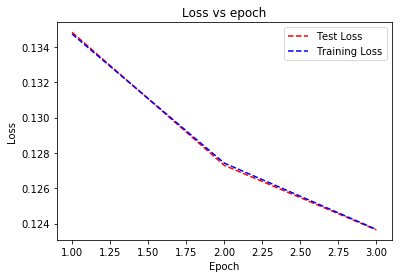

In [110]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Loss vs epoch')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

<function matplotlib.pyplot.show>

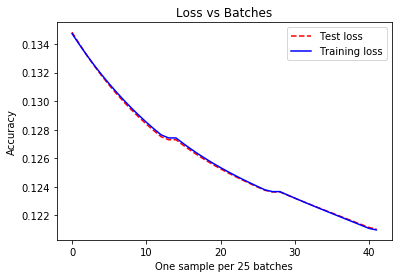

In [111]:

plt.xlabel('One sample per 25 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_loss_history, 'r--')
plt.plot(x_axis, train_loss_history, 'b-')
plt.title('Loss vs Batches')
plt.legend(['Test loss', 'Training loss'])
plt.show

## Question 2 Part 3
Describe the differences in training results comparing the different values of $\beta$.

The resulting accuracy of models trained with 0.1 and 0.9 momentum hyperparameters turn out to be extremely close. The plotted trend of losses and accuracy were very close as well. 
I did not expect this to happen. Since I initialized default grads to be 0, I expected when beta is small, the first couple of batches to produce close to 0 changes in accuracy and loss. However, it seems like my loss sampling was too sparce to exhibit this effect. Additionally, I expected higher momentum to exhibit smoother loss drop. However, both hyperparameter settings resulted in no flutuation. Therefore, I think I could justifiably crank up learning_rate by a lot.

## Question 2 Part 4
Re-use the network above, but implement the [AdaDelta](http://ruder.io/optimizing-gradient-descent/index.html#adadelta) learning algorithm. You can assume an initial value of $RMS[\nabla \theta]_{t-1} = 1.0$

In [131]:
import numpy
a = .5 
b_size = 256 #batch size
epoch_num = 3
initialize_seed = 5
test_frequency = 25
beta = 0.1
test_loss_history_epoch = []
train_loss_history_epoch = []


record_frequency = 50
test_loss_history = []
train_loss_history= []

test_accu_history = []
train_accu_history = []

class MyModel():
  
  def __init__(self):
    super(MyModel, self).__init__()
    self.w1 = tf.get_variable("w1", (784,32),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.w2 = tf.get_variable("w2", (32,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b1 = tf.get_variable("b1", (1,32),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.b2 = tf.get_variable("b2", (1,10),
        initializer=tf.random_normal_initializer(seed = initialize_seed))
    self.dw = [] 
    self.db = []
    self.prms_1 = 1
    self.prms_2 = 1
    
  def __call__(self, input):
    A1 = tf.matmul(input, self.w1) + tf.broadcast_to(self.b1, tf.matmul(input, self.w1).shape)
    A1 = tf.sigmoid(A1)
    A2 = tf.matmul(A1,self.w2) + tf.broadcast_to(self.b2, tf.matmul(A1,self.w2).shape)
    A2 = tf.nn.softmax(A2)
    return A2
  
  def update(self, dw, db, learning_rate = 0.1, beta = 0.9):##################### implemented here!!
    learning_rate_1 = self.prms_1 / rms(dw[0])
    learning_rate_2 = self.prms_2 / rms(dw[1])
    #print(learning_rate_1, learning_rate_2)
    self.w1.assign_sub(learning_rate * dw[0])
    self.w2.assign_sub(learning_rate * dw[1])
    self.b1.assign_sub(learning_rate * db[0])
    self.b2.assign_sub(learning_rate * db[1])
    self.prms_1 =  rms(dw[0])
    self.prms_2 =  rms(dw[1])
    
def rms(y):
  output = numpy.sqrt(numpy.mean(y**2))
  if output == 0:
    return 0.00000001
  return output   
  
def train_batch(model, inputs, outputs, learning_rate):
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(model.w2)
    tape.watch(model.w1)
    tape.watch(model.b1)
    tape.watch(model.b2)
    current_loss = loss(y_train,model(x_train))
  [w1_grad] = tape.gradient(current_loss, [model.w1])
  [w2_grad] = tape.gradient(current_loss, [model.w2])
  [b1_grad] = tape.gradient(current_loss, [model.b1])
  [b2_grad] = tape.gradient(current_loss, [model.b2])
  model.update([w1_grad,w2_grad],[b1_grad,b2_grad],a)
  del tape

def train(model, input, labels, learning_rate, num_epoch = 1, batch_size = 64, small_data = False):
  batch_counter = 0
  for cur_epoch in range(0, num_epoch):
    seed = math.floor(100*random.random())
    input_batches, label_batches, batch_num = batchize(input, labels, batch_size, seed)
    print("Number of batches : {}".format(len(input_batches)))
    if small_data:
      batch_num = math.ceil(batch_num/3)
    for cur_batch in range(0, batch_num):
      batch_counter += 1
      if cur_batch % test_frequency == 0:
        train_loss = loss(model(input), labels)
        train_acc = accuracy(model, input, y_train_sca)
        test_loss = loss(model(x_test), y_test)
        test_acc = accuracy(model, x_test, y_test_sca)
        test_loss_history.append(test_loss)
        train_loss_history.append(train_loss)
        test_accu_history.append(test_acc)
        train_accu_history.append(train_acc)
        print("train accu {} loss {}, test accu {} loss {}".format(train_acc, train_loss, test_acc, test_loss))
        
     # print("Training {} batch of {} epoch".format(cur_batch + 1,cur_epoch + 1))
      input_batch = input_batches[cur_batch]
      label_batch = label_batches[cur_batch]
      train_batch(model,input_batch,label_batch,learning_rate)
    train_acc, train_loss = test(model, input, labels)
    test_acc, test_loss = test(model, x_test, y_test)
    test_loss_history.append(test_loss)
    train_loss_history.append(train_loss)
    test_accu_history.append(test_acc)
    train_accu_history.append(train_acc)
    
    test_c, test_total, test_loss = test(model, x_test, y_test,False)
    print("Final Model Test Accuracy {}/{} Test Loss {}".format(test_c, test_total, test_loss))
    print("Epoch {} Testing loss{}".format(cur_epoch, test_loss))
  print("Total Batch Trained {} with size{}".format(batch_counter, batch_size))
  

def batchize(input, labels, batch_size = 64, seed = 10):
  tf.random.shuffle(input,seed)
  tf.random.shuffle(labels,seed)
  sample_num = input.shape[0]
  assert(input.shape[0] == labels.shape[0])
  input_batches = []
  label_batches = []
  i = 0
  while (i + 1) * batch_size < sample_num:
    input_batches.append(input[i:i+batch_size])
    label_batches.append(labels[i:i+batch_size])
    i = i + 1
  input_batches.append(input[i:])
  label_batches.append(labels[i:])
  return[input_batches, label_batches, i]

def loss(desired_y,predicted_y):
  return tf.losses.mean_squared_error(desired_y, predicted_y)

def accuracy(model, x, y):
  y_hat = model(x).numpy().argmax(axis=1)
  acc = (y_hat == y).sum() / y.shape[0]
  return acc


def test(model, inputs = x_test, labels = y_test, percentage = True):
  total = 0
  correct = 0
  prediction = model(inputs)
  num_tests = inputs.shape[0]
  for i in range(0, num_tests):
    pred = tf.math.argmax(input = prediction[i]).numpy()
    label = tf.math.argmax(input = labels[i]).numpy()
    if(label == pred):
      correct += 1
      total += 1
    else:
      total += 1
  accuracy = 1.0*correct/total
  print("Total {}, correct {}".format(total, correct))
  if percentage is True:
    return [correct/total, loss(prediction, labels)]
  return [correct, total, loss(prediction, labels)]
      

model = MyModel()
train(model, x_train, y_train, a,epoch_num,b_size,False)

Number of batches : 235
train accu 0.10145 loss 0.16437634825706482, test accu 0.0994 loss 0.1653192937374115
train accu 0.1053 loss 0.14803406596183777, test accu 0.1011 loss 0.14881457388401031
train accu 0.11728333333333334 loss 0.13771383464336395, test accu 0.1131 loss 0.13813640177249908
train accu 0.12306666666666667 loss 0.13519369065761566, test accu 0.1201 loss 0.13542014360427856
train accu 0.12646666666666667 loss 0.1339278668165207, test accu 0.1237 loss 0.13408103585243225
train accu 0.12943333333333334 loss 0.13282093405723572, test accu 0.1271 loss 0.1329416185617447
train accu 0.13286666666666666 loss 0.1317412257194519, test accu 0.1297 loss 0.13184216618537903
train accu 0.13618333333333332 loss 0.13067075610160828, test accu 0.1323 loss 0.1307564377784729
train accu 0.13888333333333333 loss 0.12960666418075562, test accu 0.1351 loss 0.1296789050102234
train accu 0.14155 loss 0.128548264503479, test accu 0.1383 loss 0.12860803306102753
Total 60000, correct 8555
Total

Plot the training and testing loss and the training and testing accuracy by epoch using [matplotlib](https://chrisalbon.com/deep_learning/keras/visualize_loss_history/)


<function matplotlib.pyplot.show>

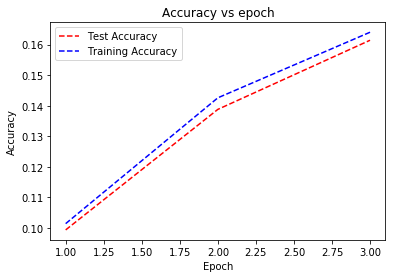

In [132]:

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_accu_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Accuracy vs epoch')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

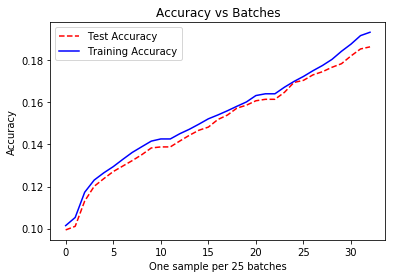

In [133]:
plt.xlabel('One sample per 25 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_accu_history, 'r--')
plt.plot(x_axis, train_accu_history, 'b-')
plt.title('Accuracy vs Batches')
plt.legend(['Test Accuracy', 'Training Accuracy'])
plt.show

<function matplotlib.pyplot.show>

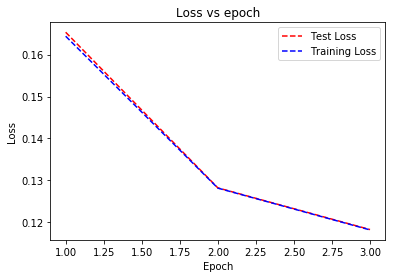

In [134]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
x_axis = range(1, epoch_num + 1)
plt.plot(x_axis, test_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'r--')

plt.plot(x_axis, train_loss_history[0::math.floor(len(test_accu_history)/epoch_num)], 'b--')
plt.title('Loss vs epoch')
plt.legend(['Test Loss', 'Training Loss'])
plt.show

<function matplotlib.pyplot.show>

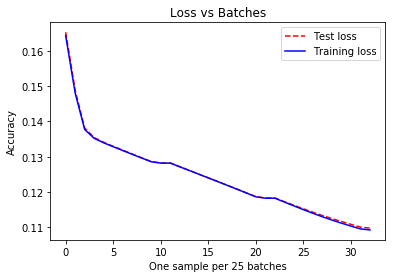

In [135]:

plt.xlabel('One sample per 25 batches')
plt.ylabel('Accuracy')
x_axis = range(0, len(test_accu_history))
plt.plot(x_axis, test_loss_history, 'r--')
plt.plot(x_axis, train_loss_history, 'b-')
plt.title('Loss vs Batches')
plt.legend(['Test loss', 'Training loss'])
plt.show